In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#Importing Test and Train data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#Combining the two datasets
Final_Dataset = pd.concat([train,test], axis=0,sort=False)

In [4]:
Final_Dataset.shape

(7043, 21)

In [5]:
Final_Dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


No     5174
Yes    1869
Name: Churn, dtype: int64


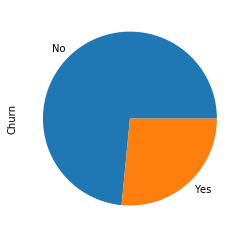

In [6]:
#Visualizing the distribution of target variable
Final_Dataset["Churn"].value_counts().plot(kind = "pie")
print(Final_Dataset["Churn"].value_counts())

In [7]:
# Checking missing values in each column
print(Final_Dataset.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
#Converting into binary

Final_Dataset["Partner"].replace(["Yes","No"],[1,0],inplace =True)
Final_Dataset["Dependents"].replace(["Yes","No"],[1,0],inplace =True)
Final_Dataset["PhoneService"].replace(["Yes","No"],[1,0],inplace =True)
Final_Dataset["MultipleLines"].replace(["Yes","No", "No phone service"],[1,0,2],inplace =True)
Final_Dataset["InternetService"].replace(["DSL","Fiber optic", "No"],[1,0,2],inplace =True)
Final_Dataset["OnlineSecurity"].replace(["Yes","No", "No internet service"],[1,0,2],inplace =True)
Final_Dataset["OnlineBackup"].replace(["Yes","No", "No internet service"],[1,0,2],inplace =True)
Final_Dataset["DeviceProtection"].replace(["Yes","No", "No internet service"],[1,0,2],inplace =True)
Final_Dataset["TechSupport"].replace(["Yes","No", "No internet service"],[1,0,2],inplace =True)
Final_Dataset["StreamingTV"].replace(["Yes","No", "No internet service"],[1,0,2],inplace =True)
Final_Dataset["StreamingMovies"].replace(["Yes","No", "No internet service"],[1,0,2],inplace =True)
Final_Dataset["Contract"].replace(["Month-to-month","One year", "Two year"],[1,0,2],inplace =True)
Final_Dataset["PaperlessBilling"].replace(["Yes","No"],[1,0],inplace =True)
Final_Dataset["PaymentMethod"].replace(["Credit card (automatic)","Electronic check", "Mailed check", "Bank transfer (automatic)"],[1,0,2,3],inplace =True)
Final_Dataset["Churn"].replace(["Yes","No"],[1,0],inplace =True)

In [9]:
# Categorizing Male and Female in 1s and 0s
def gender_labels(element):
    if element == 'Male':
        return 1
    elif element == 'Female':
        return 0
# Making a new column in the dataframe
Final_Dataset['GenderLabel'] = Final_Dataset['gender'].apply(gender_labels)

#Dropping the original gender column
Final_Dataset.drop(['gender'] ,axis = 1, inplace=True) 

In [10]:
#Creating a new column - TotalChargesNew
Final_Dataset['TotalChargesNew'] = Final_Dataset['tenure']*Final_Dataset['MonthlyCharges']

#Dropping columns not required
Final_Dataset.drop(['MonthlyCharges', 'TotalCharges','customerID'], axis = 1, inplace = True)

In [11]:
Final_Dataset.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,GenderLabel,TotalChargesNew
0,0,1,0,1,0,2,1,0,1,0,0,0,0,1,1,0,0,0,29.85
1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,0,2,0,1,1936.30
2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,2,1,1,107.70
3,0,0,0,45,0,2,1,1,0,1,1,0,0,0,0,3,0,1,1903.50
4,0,0,0,2,1,0,0,0,0,0,0,0,0,1,1,0,1,0,141.40


In [12]:
X = Final_Dataset.drop('Churn', axis = 1)
y= Final_Dataset['Churn']

In [13]:
## Splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

In [14]:
#cross validation
def val(a,b,classifier):
    val = cross_val_score(classifier,a,b,scoring = "accuracy",cv = 10)
    return val
    

##accuracy
def accuracy(a,b):
    ac = accuracy_score(a,b)
    cr = classification_report(a,b)
    print("accuracy score : ",ac)
    print("--"*15)
    print("Classification report :",cr)
    return ac

In [15]:
#Applying SVM
## Training algorithm (Linear Kernel)
from sklearn.svm import SVC
svclassifier = SVC (kernel = 'linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
##Making Predictions
y_pred1 = svclassifier.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
acc_svc1 = accuracy(y_test,y_pred1)

accuracy score :  0.7785139611926172
------------------------------
Classification report :               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.62      0.45      0.52       564

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.69      2113
weighted avg       0.76      0.78      0.77      2113



0.5175257731958763


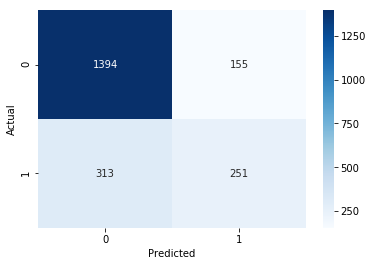

In [18]:
##confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
y_pred1 = svclassifier.predict(X_test)
def cm(pred):
    cm = confusion_matrix(y_test, y_pred1)
    fig = plt.plot(figsize=(8,5))
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f1_score(y_test,y_pred1))
    return plt.show()
cm(y_pred1)

In [19]:
## Training algorithm (Gaussian Kernel)
from sklearn.svm import SVC
svclassifier1 = SVC (kernel = 'rbf')
svclassifier1.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
##Making Predictions
y_pred2 = svclassifier1.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
acc_svc2 = accuracy(y_test,y_pred2)

accuracy score :  0.7330809275911027
------------------------------
Classification report :               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       564

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



C:\Users\Paridhi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Paridhi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Paridhi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0


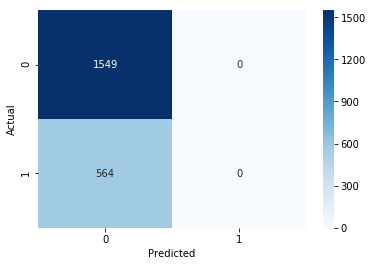

In [22]:
y_pred2 = svclassifier1.predict(X_test)
def cm(pred):
    cm = confusion_matrix(y_test, y_pred2)
    fig = plt.plot(figsize=(8,5))
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f1_score(y_test,y_pred2))
    return plt.show()
cm(y_pred2)

In [23]:
## Training algorithm (Sigmoid Kernel)
from sklearn.svm import SVC
svclassifier2 = SVC (kernel = 'sigmoid')
svclassifier2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
##Making Predictions
y_pred3 = svclassifier2.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
acc_svc3 = accuracy(y_test,y_pred3)

accuracy score :  0.6507335541883578
------------------------------
Classification report :               precision    recall  f1-score   support

           0       0.76      0.77      0.76      1549
           1       0.34      0.32      0.33       564

    accuracy                           0.65      2113
   macro avg       0.55      0.54      0.54      2113
weighted avg       0.64      0.65      0.65      2113



0.3254113345521024


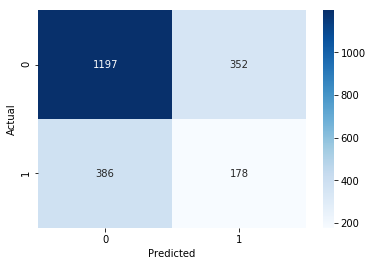

In [26]:
y_pred3 = svclassifier2.predict(X_test)
def cm(pred):
    cm = confusion_matrix(y_test, y_pred3)
    fig = plt.plot(figsize=(8,5))
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f1_score(y_test,y_pred3))
    return plt.show()
cm(y_pred3)

,accuracy
Linear,0.778514
Gaussian,0.733081
Sigmoid,0.650734


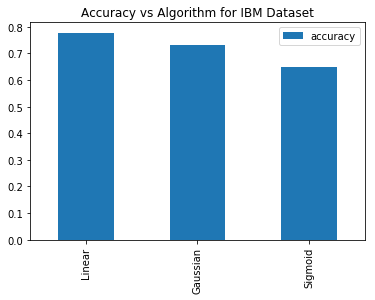

In [27]:
z = pd.DataFrame(data = [acc_svc1,acc_svc2,acc_svc3],index = ['Linear','Gaussian','Sigmoid'],columns=[ "accuracy"])
#comparing results
z.plot(kind = 'bar',title="Accuracy vs Algorithm for IBM Dataset")
z